In [1]:
# Exploratory Data Analysis

In [115]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
conda install -c conda-forge mlxtend

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [117]:
# setting up default plotting parameters
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis') 
sns.set_style('white') 
sns.set_context('talk', font_scale=0.8)

In [118]:
# Loading the Dataset

In [119]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [120]:
train_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0
1,15574523,Cheng,576,France,Male,39,1,0.00,2,1,1,68814.23,0
2,15587443,Akudinobi,728,France,Female,69,1,0.00,2,1,1,131804.86,0
3,15768682,Amies,640,Spain,Male,39,3,0.00,1,1,1,105997.25,0
4,15569682,Leckie,768,Germany,Male,37,9,108308.11,1,1,0,41788.25,1


In [121]:
test_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15642544,Henderson,723,France,Male,34,5,0.00,2,0,1,12092.03
1,15779492,Trevisano,796,Spain,Male,56,6,94231.13,1,0,0,121164.60
2,15815271,Ritchie,755,Germany,Male,43,6,165048.50,3,1,0,16929.41
3,15582591,Chiabuotu,615,Spain,Male,59,4,155766.05,1,1,1,110275.17
4,15595937,Bruno,430,Germany,Male,36,1,138992.48,2,0,0,122373.42


In [122]:
test_data.shape

(3000, 12)

In [123]:
train_data.shape

(7000, 13)

In [124]:
#Summing the missing values in the train data
train_data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [125]:
#Summing the missing values in the test data
test_data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [126]:
# Getting the summary statistics of the data
train_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,1.569078e+07,649.424000,38.932857,5.008143,77006.866360,1.525857,0.709286,0.514429,99783.685516,0.201429
std,7.191100e+04,97.478815,10.467815,2.891734,62392.609703,0.582318,0.454124,0.499827,57358.455381,0.401096
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.562847e+07,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50957.302500,0.000000
50%,1.569053e+07,651.000000,37.000000,5.000000,97529.180000,1.000000,1.000000,1.000000,99594.475000,0.000000
75%,1.575333e+07,716.000000,44.000000,7.000000,127942.495000,2.000000,1.000000,1.000000,149462.720000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199953.330000,1.000000


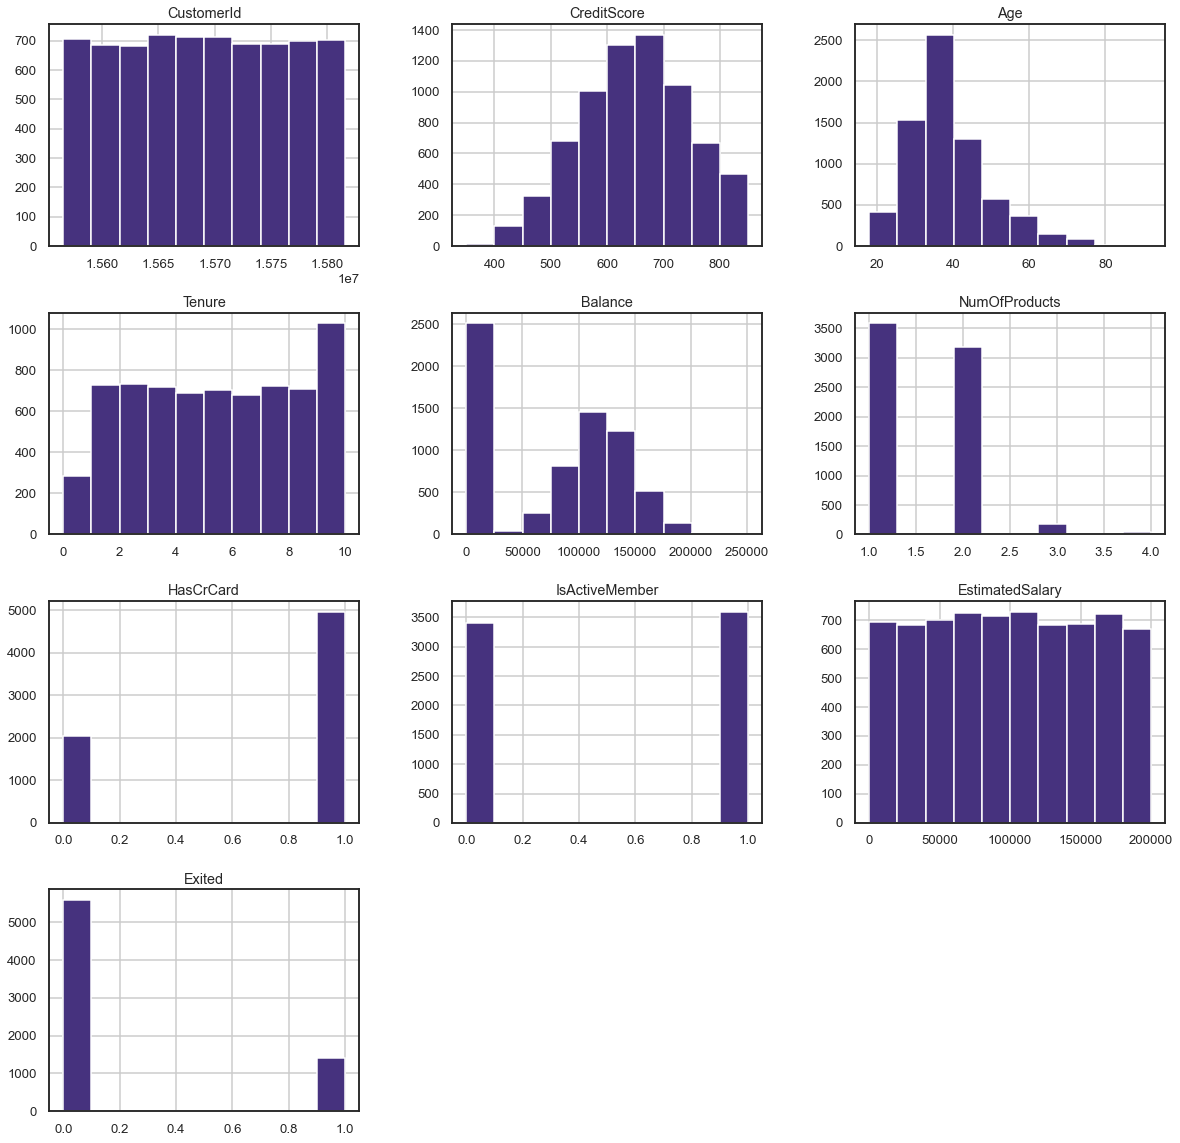

In [127]:
train_data.hist(figsize=(20,20))
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


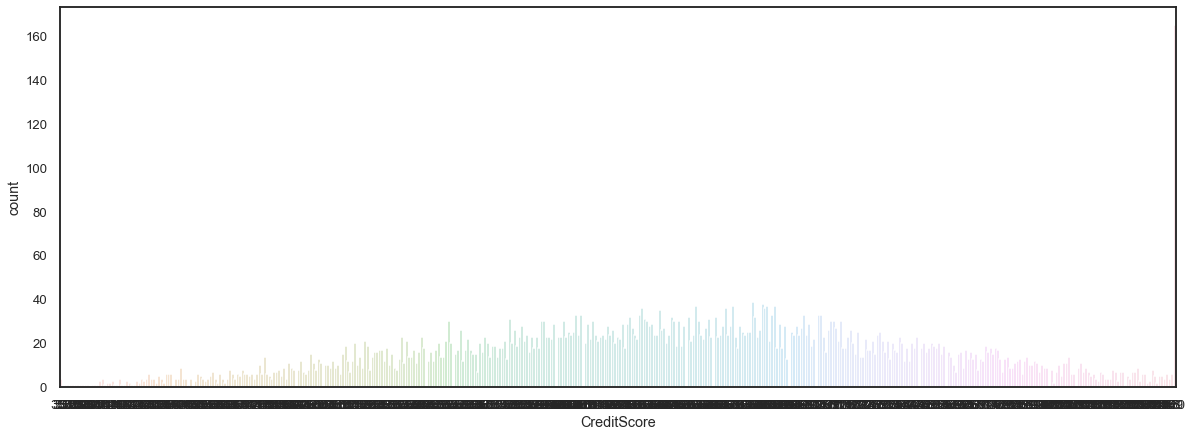

In [128]:
sns.countplot('CreditScore', data = train_data)
plt.show()

In [129]:
# Creating a pie chart to count customers by credit score
df_CustomerId = train_data.groupby(['CustomerId']).count()[['Exited']]
df_CustomerId.head()
df_CustomerId.plot.pie(y='Exited', figsize=(5, 5))
plt.legend(loc = 0)
plt.show()

ValueError: Image size of 371x131904 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 360x360 with 1 Axes>

## Correlation

> Correlation is an indication about the changes between two variables. We can plot correlation matrix to show which variable is having a high or low correlation in respect to another variable.
>>It is important to note that correlation coefficients only measure linear correlations.

In [130]:
train_data.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.008499,0.009929,-0.018993,-0.021439,0.011442,-0.019029,-0.011828,0.032816,-0.007060
CreditScore,0.008499,1.000000,-0.002511,-0.006013,0.002181,0.008048,-0.008505,0.026724,-0.007756,-0.032201
Age,0.009929,-0.002511,1.000000,0.001982,0.019424,-0.030046,-0.014927,0.085195,0.009270,0.288732
Tenure,-0.018993,-0.006013,0.001982,1.000000,0.001221,-0.003052,0.025304,-0.025239,0.007210,-0.009668
Balance,-0.021439,0.002181,0.019424,0.001221,1.000000,-0.303379,-0.009317,-0.010813,0.018277,0.111493
NumOfProducts,0.011442,0.008048,-0.030046,-0.003052,-0.303379,1.000000,0.009249,0.008045,0.015463,-0.040043
HasCrCard,-0.019029,-0.008505,-0.014927,0.025304,-0.009317,0.009249,1.000000,-0.020230,-0.010966,-0.008701
IsActiveMember,-0.011828,0.026724,0.085195,-0.025239,-0.010813,0.008045,-0.020230,1.000000,-0.018574,-0.167725
EstimatedSalary,0.032816,-0.007756,0.009270,0.007210,0.018277,0.015463,-0.010966,-0.018574,1.000000,0.016426
Exited,-0.007060,-0.032201,0.288732,-0.009668,0.111493,-0.040043,-0.008701,-0.167725,0.016426,1.000000


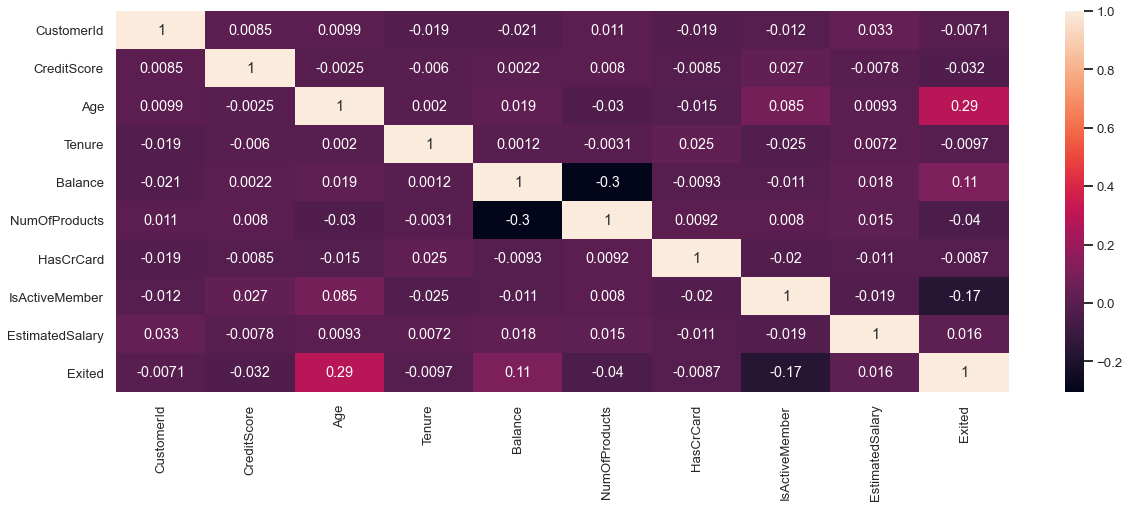

In [131]:
sns.heatmap(train_data.corr(), annot=True)
plt.show()

### Pearson Correlation of Features

> Pearson's Correlation method is used for finding the association between the continuous features and the class feature. 
>>It is also used for finding the feature- feature correlation to remove redundant feature.

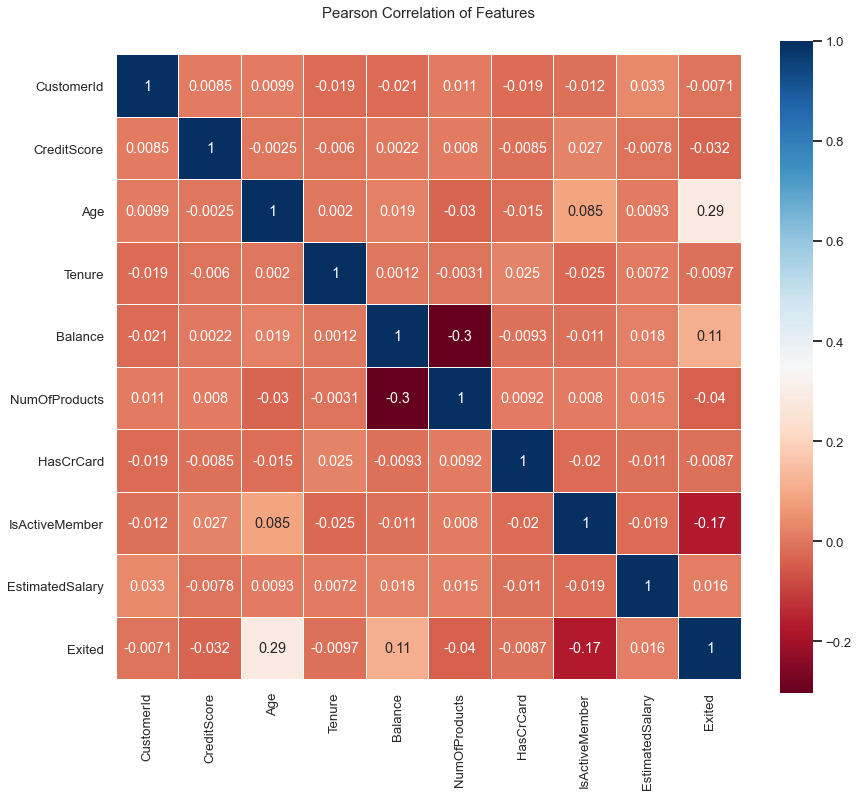

In [132]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

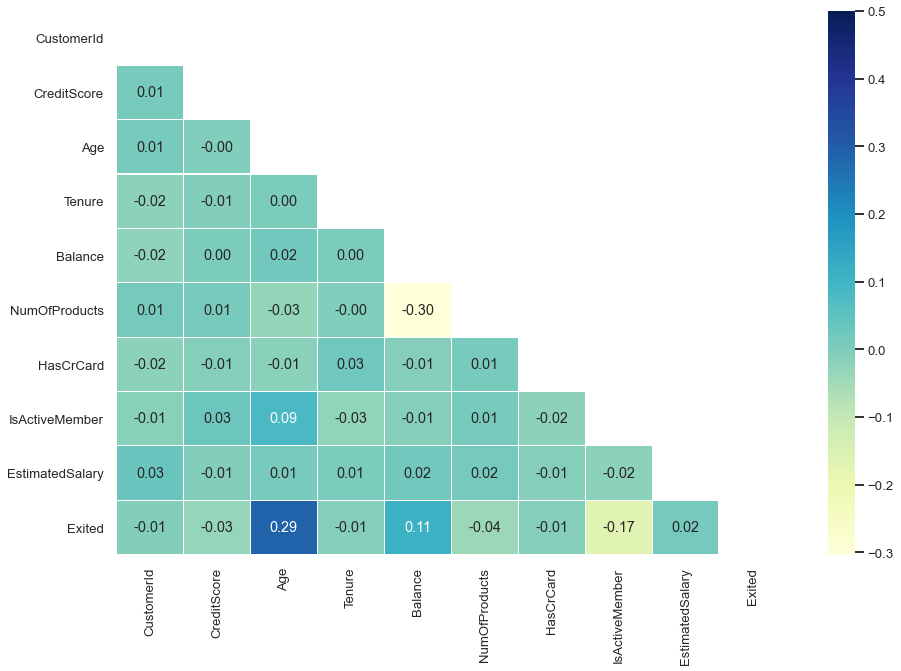

In [133]:
# To Calculate correlations
corr = train_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap Representation
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
             annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")
plt.show()

In [134]:
# Find correlations with the target and sort
correlations = train_data.corr()['Exited'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 CustomerId        -0.007060
EstimatedSalary    0.016426
Balance            0.111493
Age                0.288732
Exited             1.000000
Name: Exited, dtype: float64

Most Negative Correlations: 
 IsActiveMember   -0.167725
NumOfProducts    -0.040043
CreditScore      -0.032201
Tenure           -0.009668
HasCrCard        -0.008701
Name: Exited, dtype: float64


## EDA Concluding Remarks

Let's summarise the findings from this EDA: <br>

> - The dataset has all features in their correct data type. <br>
- The strongest positive correlations with the target features are: **Customer_Id**, **EstimatedSalary**, **Balance**, **Age**. 
- The strongest negative correlations with the target features are: **IsActiveMember**, **NumOfProducts**, **CreditScore**, **Tenure**, and **HasCrCard** .
- The dataset is **imbalanced** with the majoriy of observations describing unpromoted employees. <br>
- Several features (ie columns) are not applicable for our analysis, namely: Exited, Surname, CustomerId, Gender. <br>

Other observations include: <br>

[0.13780265 0.04107271 0.24673598 0.10444976 0.12918111 0.14870764
 0.02266529 0.03919383 0.13019103]


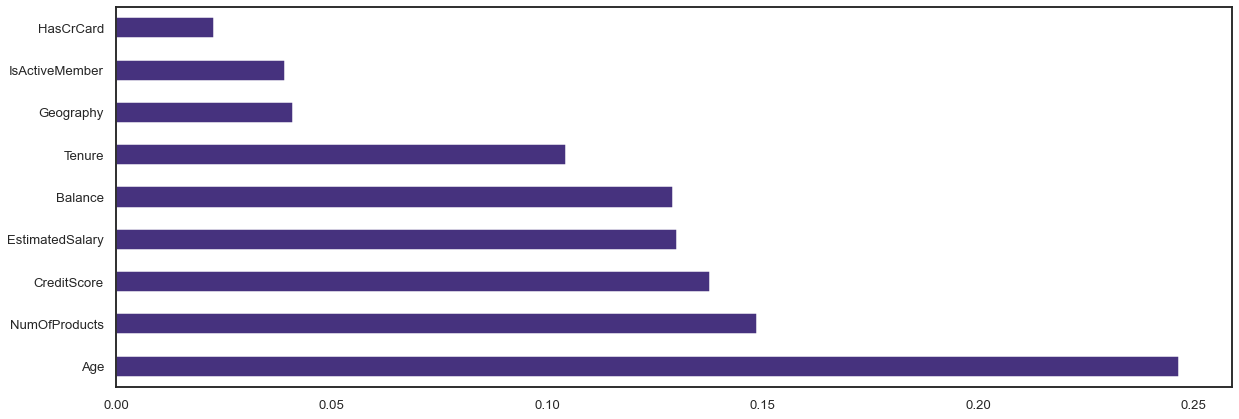

In [226]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(train_features,train_target)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_,index=train_features.columns)
feat_importance.nlargest(10).plot(kind = 'barh')
plt.show()

In [227]:
# drop target and unecessary columns/labels from train data and assign to features
train_features = train_data.drop(['Exited', 'Surname', 'CustomerId', 'Gender', 'HasCrCard', 'IsActiveMember', 'Geography'], axis = 1) # in python, Row 0 column 1 for axis
train_features

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,601,41,1,0.00,2,160607.06
1,576,39,1,0.00,2,68814.23
2,728,69,1,0.00,2,131804.86
3,640,39,3,0.00,1,105997.25
4,768,37,9,108308.11,1,41788.25
...,...,...,...,...,...,...
6995,732,79,10,61811.23,1,104222.80
6996,508,41,5,0.00,2,94170.84
6997,705,38,1,189443.72,1,106648.58
6998,664,44,8,142989.69,1,115452.51


In [208]:
train_target = train_data['Exited']

In [137]:
# Assigning Customer Id to a variable to use as a unique identifier
CustomerId = test_data['CustomerId']

In [228]:
# drop target and unecessary columns from test data and assign to features
test_features = test_data.drop(['Surname', 'CustomerId', 'Gender', 'HasCrCard', 'IsActiveMember', 'Geography'], axis = 1)
test_features

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,723,34,5,0.00,2,12092.03
1,796,56,6,94231.13,1,121164.60
2,755,43,6,165048.50,3,16929.41
3,615,59,4,155766.05,1,110275.17
4,430,36,1,138992.48,2,122373.42
...,...,...,...,...,...,...
2995,770,45,4,110765.68,1,26163.74
2996,714,26,3,119545.48,2,65482.94
2997,764,39,1,129068.54,2,187905.12
2998,416,41,10,122189.66,2,98301.61


## Encoding the non-numeric variables

In [197]:
# Encoading the categorical variables
from sklearn import preprocessing
#creating label encoader
le = preprocessing.LabelEncoder()

In [210]:
#converting string lables into numbers
train_features['Geography']=le.fit_transform(train_features['Geography'])
test_features['Geography']=le.fit_transform(test_features['Geography'])
test_features

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,723,0,34,5,0.00,2,0,1,12092.03
1,796,2,56,6,94231.13,1,0,0,121164.60
2,755,1,43,6,165048.50,3,1,0,16929.41
3,615,2,59,4,155766.05,1,1,1,110275.17
4,430,1,36,1,138992.48,2,0,0,122373.42
...,...,...,...,...,...,...,...,...,...
2995,770,1,45,4,110765.68,1,1,0,26163.74
2996,714,1,26,3,119545.48,2,1,0,65482.94
2997,764,0,39,1,129068.54,2,1,1,187905.12
2998,416,1,41,10,122189.66,2,1,0,98301.61


# Decision Tree Model
Decision tree algorithm is a type of non-linear classification model, where data points pass through a tree-like process in order to predict an output variable.

In [141]:
#Fitting the Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [162]:
# Using the Decision tree classifier to create a model
classifier6 = DecisionTreeClassifier()
# model = classifier6.fit(train_features, train_target)

In [143]:
#Using the model to make a Prediction
target_pred = model.predict(test_features)

In [144]:
prediction = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred})

In [145]:
prediction.to_csv('initial_prediction.csv', index = False) 

## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

In [146]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
model = classifier.fit(train_features, train_target)

In [147]:
target_pred2 = model.predict(test_features)

In [148]:
prediction2 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred2})

In [149]:
prediction2.to_csv('prediction2.csv', index = False) 

## Support vector machine
support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection.

In [163]:
from sklearn.svm import SVC
classifier8 = SVC(kernel='poly', random_state=0) #support vector model 
# model = classifier.fit(train_features, train_target)

In [38]:
target_pred3 = model.predict(test_features)

In [39]:
prediction3 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred3})

In [40]:
prediction3.to_csv('prediction3.csv', index = False) 

## Random Forest Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier()
# model = classifier3.fit(train_features, train_target)

In [42]:
target_pred4 = model.predict(test_features)

In [43]:
prediction4 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred4})

In [44]:
prediction4.to_csv('prediction4.csv', index = False) 

## Gradient Boosting algorithm

In [229]:
from sklearn.ensemble import GradientBoostingClassifier
classifier2 = GradientBoostingClassifier()
model = classifier2.fit(train_features, train_target)

In [230]:
GradientBoostingClassifier?

In [231]:
target_pred5 = model.predict(test_features)

In [232]:
prediction5 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred5})

In [233]:
prediction5.to_csv('prediction5.csv', index = False)

## BaggingClassifier

In [165]:
from sklearn.ensemble import BaggingClassifier
classifier7 = BaggingClassifier()
# model = classifier.fit(train_features, train_target)

In [51]:
target_pred6 = model.predict(test_features)
prediction6 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred6})
prediction6.to_csv('prediction6.csv', index = False)

## KNeighbour

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
model = classifier.fit(train_features, train_target)

In [53]:
target_pred7 = model.predict(test_features)
prediction7 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred7})
prediction7.to_csv('prediction7.csv', index = False)

In [54]:
#K Nearest Neighbour

In [57]:
from sklearn.neighbors import NearestNeighbors
classifier = NearestNeighbors()
model = classifier.fit(train_features, train_target)

In [58]:
target_pred9 = model.predict(test_features)
prediction9 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred9})
prediction9.to_csv('prediction9.csv', index = False)

AttributeError: 'NearestNeighbors' object has no attribute 'predict'

## Extra Trees Classifier

In [166]:
from sklearn.ensemble import ExtraTreesClassifier
classifier1 = ExtraTreesClassifier()
# model = classifier1.fit(train_features, train_target)

In [ ]:
target_pred8 = model.predict(test_features)
prediction8 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred8})
prediction8.to_csv('prediction8.csv', index = False)

## Gaussian Naive Bayes model

In [167]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
# model = classifier5.fit(train_features, train_target)

In [ ]:
target_pred10 = model.predict(test_features)
prediction10 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred10})
prediction10.to_csv('prediction10.csv', index = False)

# AdaBooster

In [168]:
from sklearn.ensemble import AdaBoostClassifier
classifier4 = AdaBoostClassifier()
# model = classifier4.fit(train_features, train_target)

In [ ]:
target_pred11 = model.predict(test_features)
prediction11 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred11})
prediction11.to_csv('prediction11.csv', index = False)

## StackingCVClassifier

In [169]:
from mlxtend.classifier import StackingCVClassifier
# Initializing the StackingCV classifier
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
shuffle = False, use_probas = True,cv = 5, meta_classifier = SVC(probability = True))

In [173]:
# Create list to store classifiers
classifiers = {"ETC": classifier1, 
               "GBa": classifier2, 
               'GNBm':classifier5, 'DT':classifier6, "Stack": sclf}

In [174]:
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(train_features, train_target)
        
    # Save fitted classifier
    classifiers[key] = classifier

In [175]:
target_pred12 = classifier.predict(test_features)
prediction12 = pd.DataFrame({'CustomerId': CustomerId, 'Exited': target_pred12})
prediction12.to_csv('prediction12.csv', index = False)

In [176]:
"RFC": classifier3, "AdaB": classifier4, 'BC': classifier7, 'SVC':classifier8

SyntaxError: invalid syntax (<ipython-input-176-9ce4c8cd968c>, line 1)

# Voting Classifier

In [185]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [186]:
log_clf = ExtraTreesClassifier()
rnd_clf = RandomForestClassifier()
knn_clf = GradientBoostingClassifier()

In [187]:
vot_clf = VotingClassifier(estimators = [('lr', log_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'hard')

In [188]:
vot_clf.fit(train_features, train_target)

VotingClassifier(estimators=[('lr', ExtraTreesClassifier()),
                             ('rnd', RandomForestClassifier()),
                             ('knn', GradientBoostingClassifier())])

In [190]:
pred = vot_clf.predict(test_features)
pred = pd.DataFrame({'CustomerId': CustomerId, 'Exited': pred})
pred.to_csv('prediction13.csv', index = False)